<a href="https://colab.research.google.com/github/JaFrese/Support_R_TIN/blob/main/Semana_4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Pregunta: Haga una análisis de componentes principales para el dataset bank2.dat
# a) Indique que combinación de variables aporta más información en la clasificación de los
# billetes en verdaderos y falsos. Comente su respuesta
# b) ¿Qué porcentaje de la varianza de los datos explica el primer componente principal?
# Grafique en un diagrama de dispersión PC1 vs PC2, PC2 vs PC3, PC1 vs PC3, además un diagrama
# de la varianzas explicada por los componentes.
datos=read.table('https://raw.githubusercontent.com/JaFrese/DataFrames/main/bank2.dat')
X=datos[,-7]#eliminamos la última columna (label)
head(X)
x<-data.matrix(X)
class(x)
dim(x)
(n = nrow(x))
cov(x)
#cálculo de los valores y vectores propios de la matriz de covarianza:
e = eigen(cov(x))
(e1 = e$values)
e$vectors
#datos multiplicados por la matriz formada por los vectores propios
y = as.matrix(x) %*% e$vectors #Hace la transformación de las variables originales a los componentes principales
par(mfrow = c(1, 1))

,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,214.8,131.0,131.1,9.0,9.7,141.0
2,214.6,129.7,129.7,8.1,9.5,141.7
3,214.8,129.7,129.7,8.7,9.6,142.2
4,214.8,129.7,129.6,7.5,10.4,142.0
5,215.0,129.6,129.7,10.4,7.7,141.8
6,215.7,130.8,130.5,9.0,10.1,141.4


[1] "matrix" "array"

[1] 200   6

[1] 200

,V1,V2,V3,V4,V5,V6
V1,0.14179296,0.03144322,0.02309146,-0.1032462,-0.0185407,0.08430553
V2,0.03144322,0.13033945,0.10842739,0.2158028,0.1050394,-0.20934196
V3,0.02309146,0.10842739,0.16327412,0.2841319,0.1299967,-0.24047010
V4,-0.10324623,0.21580276,0.28413191,2.0868781,0.1645389,-1.03699623
V5,-0.01854070,0.10503945,0.12999673,0.1645389,0.6447234,-0.54961482
V6,0.08430553,-0.20934196,-0.24047010,-1.0369962,-0.5496148,1.32771633


[1] 3.00030487 0.93562052 0.24341371 0.19465874 0.08521185 0.03551468

-0.04377427,0.01070966,-0.3263165,0.5616918,0.75257278,0.09809807
0.11216159,0.07144697,-0.2589614,0.4554588,-0.34680082,-0.76651197
0.13919062,0.06628208,-0.3447327,0.4153296,-0.53465173,0.63169678
0.76830499,-0.56307225,-0.2180222,-0.1861082,0.09996771,-0.02221711
0.20176610,0.65928988,-0.5566857,-0.4506985,0.10190229,-0.03485874
-0.57890193,-0.48854255,-0.5917628,-0.2584483,-0.08445895,-0.04567946


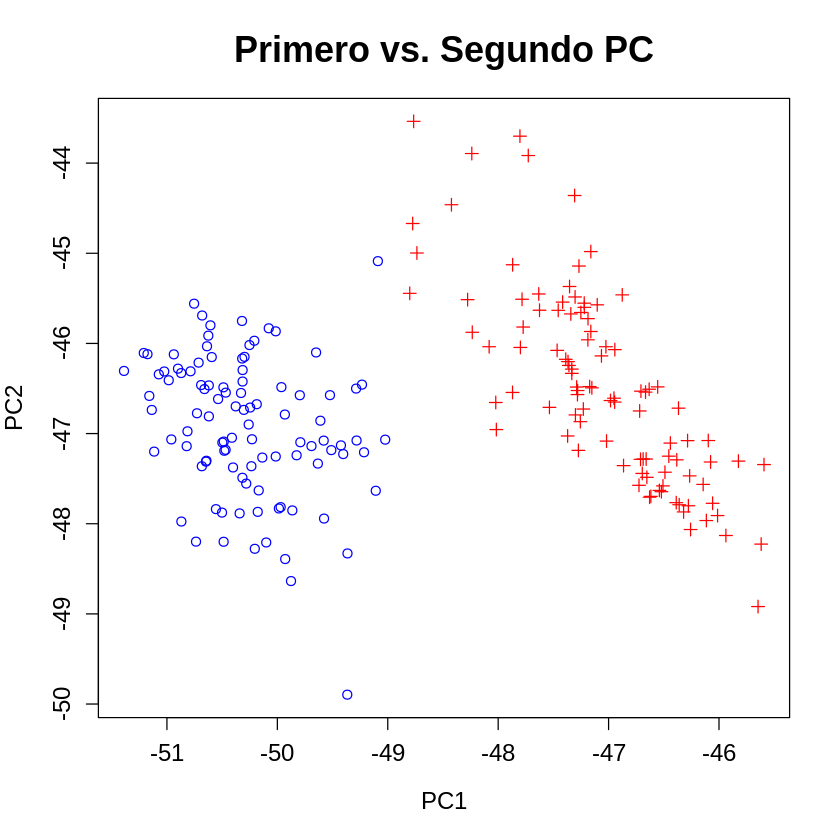

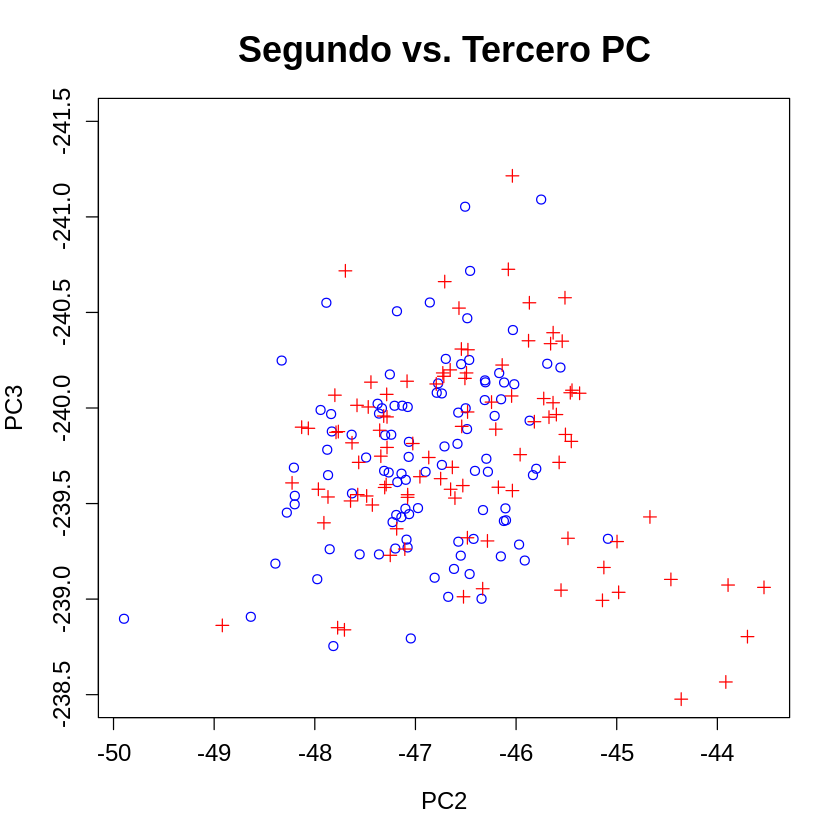

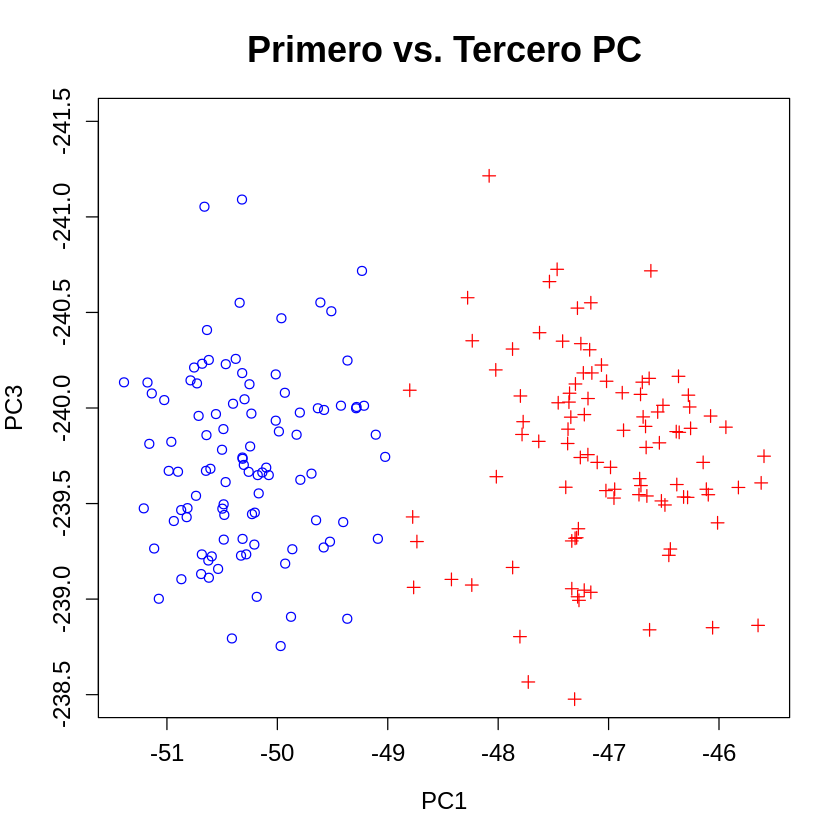

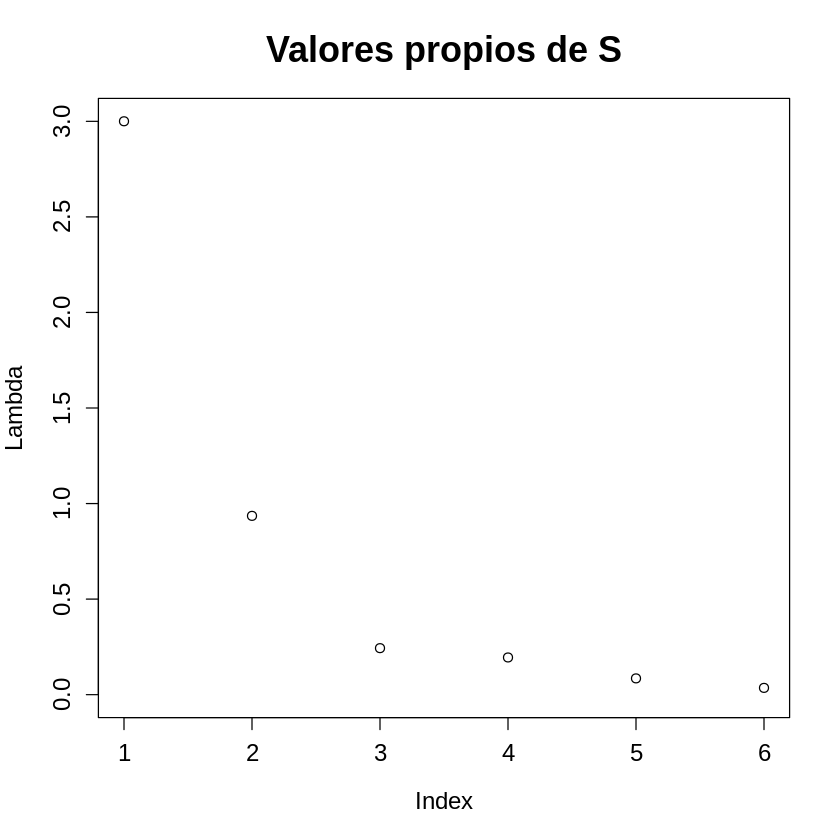

In [5]:
#plot primero vs. segundo PC
plot(y[, 1], y[, 2], pch = c(rep(1, 100), rep(3, 100)),
     col = c(rep("blue", 100), rep("red", 100)),
     xlab = "PC1", ylab = "PC2", main = "Primero vs. Segundo PC",
     cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.8)

#plot segundo vs. tercero PC
plot(y[, 2], y[, 3], pch = c(rep(1, 100), rep(3, 100)),
     col = c(rep("blue", 100), rep("red", 100)),
     ylim = c(-238.5, -241.5), xlab = "PC2",
     ylab = "PC3", main = "Segundo vs. Tercero PC",
     cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.8)

#plot of the primero vs. tercero PC
plot(y[, 1], y[, 3], pch = c(rep(1, 100), rep(3, 100)),
     col = c(rep("blue", 100), rep("red", 100)),
     ylim = c(-238.5, -241.5), xlab = "PC1", ylab = "PC3",
     main = "Primero vs. Tercero PC",
     cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.8)

#plot de los valores propios
plot(e1, ylim = c(0, 3), xlab = "Index", ylab = "Lambda",
     main = "Valores propios de S",
     cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.8)

,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,214.8,131.0,131.1,9.0,9.7,141.0
2,214.6,129.7,129.7,8.1,9.5,141.7
3,214.8,129.7,129.7,8.7,9.6,142.2
4,214.8,129.7,129.6,7.5,10.4,142.0
5,215.0,129.6,129.7,10.4,7.7,141.8
6,215.7,130.8,130.5,9.0,10.1,141.4


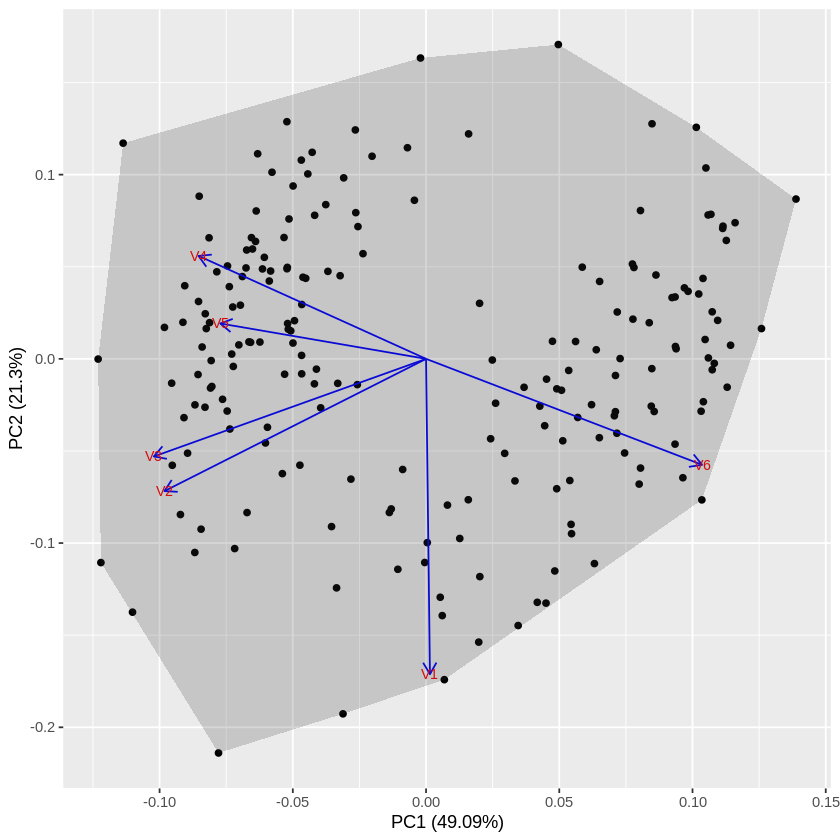

In [7]:

par(mfrow = c(1, 1))
head(datos)

# Otra visulización
#install.packages("ggfortify")
library(ggfortify)

autoplot(prcomp(X,scale=T), data = datos,
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3,frame = TRUE)
